In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm


In [2]:
df=pd.read_csv("egypt_education_dataset.csv")
df.head()

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
2,Melissa Lee,16,Year 10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
4,Eric Steele,17,Year 11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467


In [3]:
df.columns

Index(['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
       'Subject_8', 'Subject_9', 'Subject_10'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Student Name    50000 non-null  object 
 1   Student Age     50000 non-null  int64  
 2   Student year    50000 non-null  object 
 3   Father Degree   39960 non-null  object 
 4   Mother Degree   39910 non-null  object 
 5   Education Type  50000 non-null  object 
 6   Subject_1       50000 non-null  float64
 7   Subject_2       50000 non-null  float64
 8   Subject_3       50000 non-null  float64
 9   Subject_4       50000 non-null  float64
 10  Subject_5       50000 non-null  float64
 11  Subject_6       50000 non-null  float64
 12  Subject_7       50000 non-null  float64
 13  Subject_8       50000 non-null  float64
 14  Subject_9       50000 non-null  float64
 15  Subject_10      50000 non-null  float64
dtypes: float64(10), int64(1), object(5)
memory usage: 6.1+ MB


In [5]:
df.describe()

,Student Age,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,16.00368,74.730855,74.697132,74.658231,74.789693,74.610735,74.741407,74.690653,74.734522,74.710284,74.689639
std,1.41582,14.345020,14.367525,14.330384,14.366513,14.326871,14.408353,14.348436,14.373802,14.355054,14.365250
min,14.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,15.00000,64.918132,64.786097,64.870431,64.884569,64.752157,64.837589,64.944466,64.985014,64.977238,64.845485
50%,16.00000,75.050027,74.916854,74.959196,75.045955,74.920325,75.083056,74.966657,74.949263,75.033263,74.987325
75%,17.00000,85.145231,85.139383,84.972541,85.268959,84.984459,85.208810,85.071789,85.119971,85.152224,85.087438
max,18.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [6]:
df.isnull().sum()

Student Name          0
Student Age           0
Student year          0
Father Degree     10040
Mother Degree     10090
Education Type        0
Subject_1             0
Subject_2             0
Subject_3             0
Subject_4             0
Subject_5             0
Subject_6             0
Subject_7             0
Subject_8             0
Subject_9             0
Subject_10            0
dtype: int64

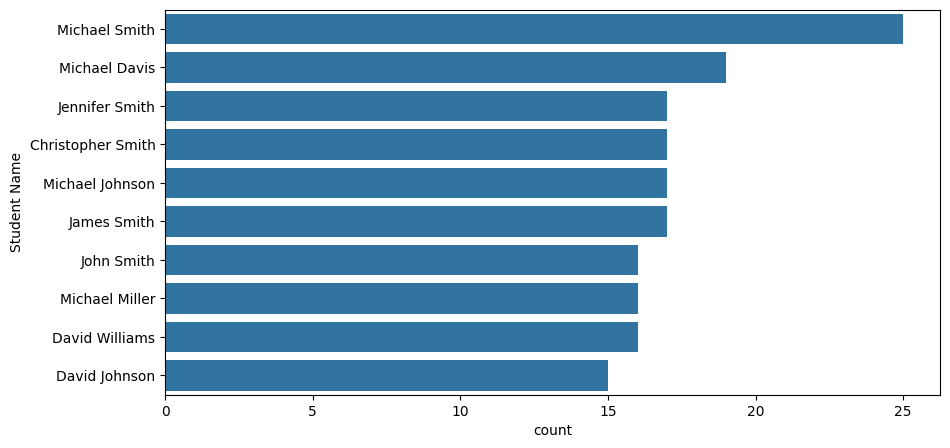

In [7]:
top_10=df["Student Name"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_10,y=top_10.index)
plt.show()  


In [8]:
# Calculate the total score for each student by summing the subject columns
df['Total_Score'] = df['Subject_1'] + df['Subject_2'] + df['Subject_3'] + df['Subject_4']+df['Subject_5']+df['Subject_6']+df['Subject_7']+df['Subject_8']+df['Subject_9']+df['Subject_10']

total_score = df.groupby('Student Name')['Total_Score'].sum()

total_score = total_score.sort_values(ascending=False)

total_score


Student Name
Michael Smith         18703.745550
Michael Davis         14472.882491
Jennifer Smith        12784.581158
Christopher Smith     12781.211972
Michael Johnson       12669.608879
                          ...     
Nicole Robinson         581.464949
David Matthews DDS      581.363842
Nicholas Hernandez      573.304721
Karen Doyle             568.286463
Kyle Williams DDS       568.237973
Name: Total_Score, Length: 40111, dtype: float64

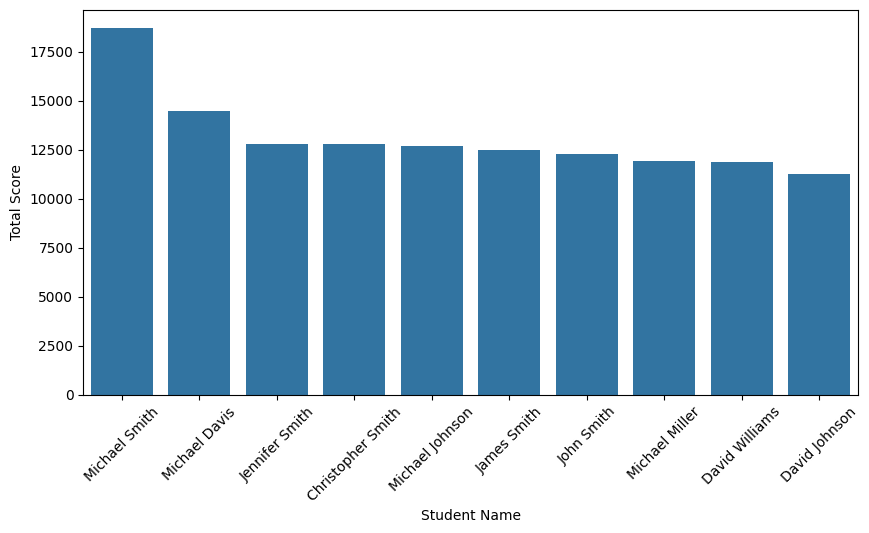

In [9]:
top_10=total_score.head(10)
total_score_df = top_10.reset_index()

total_score_df.columns = ['Student Name', 'Total Score']

plt.figure(figsize=(10, 5))
sns.barplot(data=total_score_df, x='Student Name', y='Total Score')
plt.xticks(rotation=45) 
plt.show()

In [10]:
total_type=df.groupby("Education Type").size().reset_index(name='Count')
total_type=total_type.sort_values(by='Count', ascending=False)
total_type

,Education Type,Count
0,IB,16977
2,Thanweya,16545
1,IGCSE,16478


In [11]:

total_education = df.groupby('Education Type')['Total_Score'].max()

total_education = total_education.sort_values(ascending=False)

total_education

Education Type
IB          915.482753
IGCSE       906.929669
Thanweya    904.766691
Name: Total_Score, dtype: float64

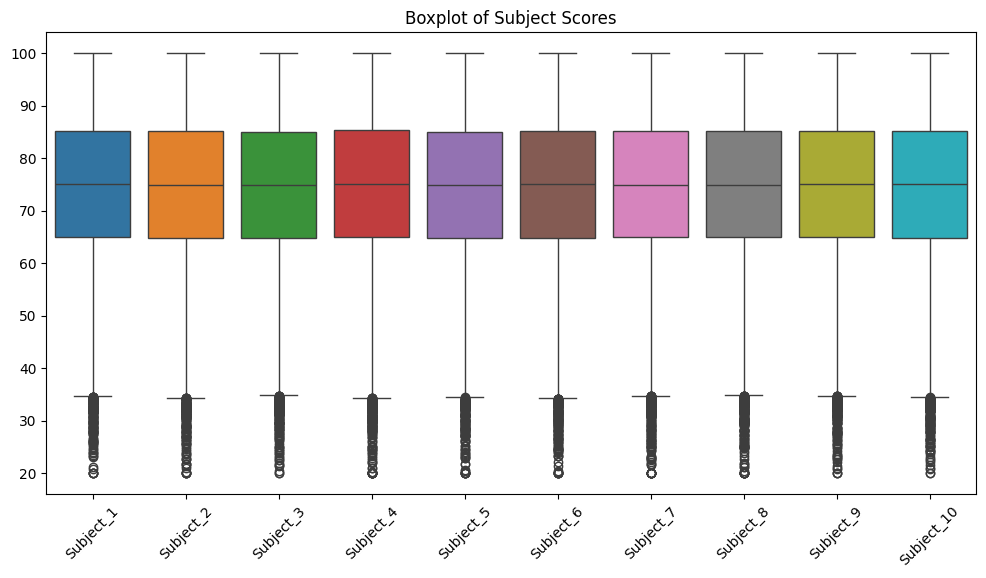

In [12]:
df.describe()
plt.figure(figsize=(12,6))
sns.boxplot(data=df.iloc[:, 6:16])
plt.title("Boxplot of Subject Scores")
plt.xticks(rotation=45)
plt.show()


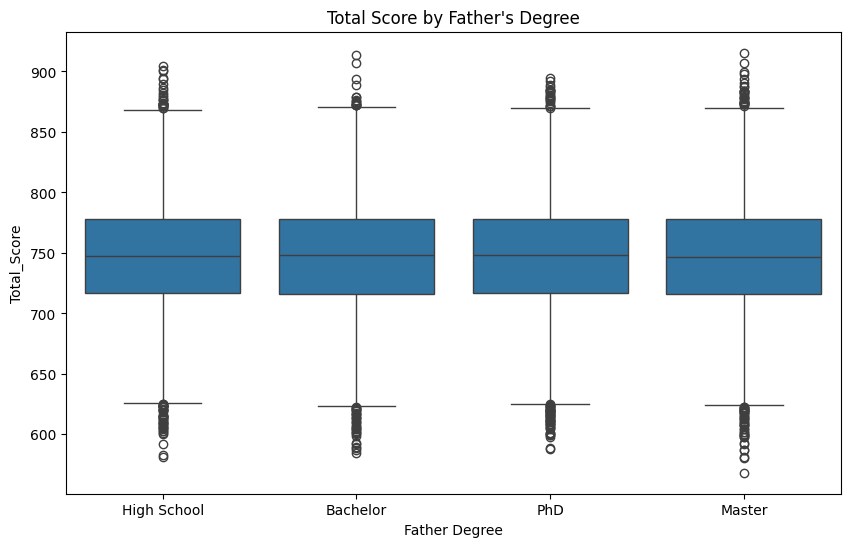

In [13]:
df['Total_Score'] = df.iloc[:, 6:16].sum(axis=1)
plt.figure(figsize=(10,6))
sns.boxplot(x='Father Degree', y='Total_Score', data=df)
plt.title("Total Score by Father's Degree")
plt.show()


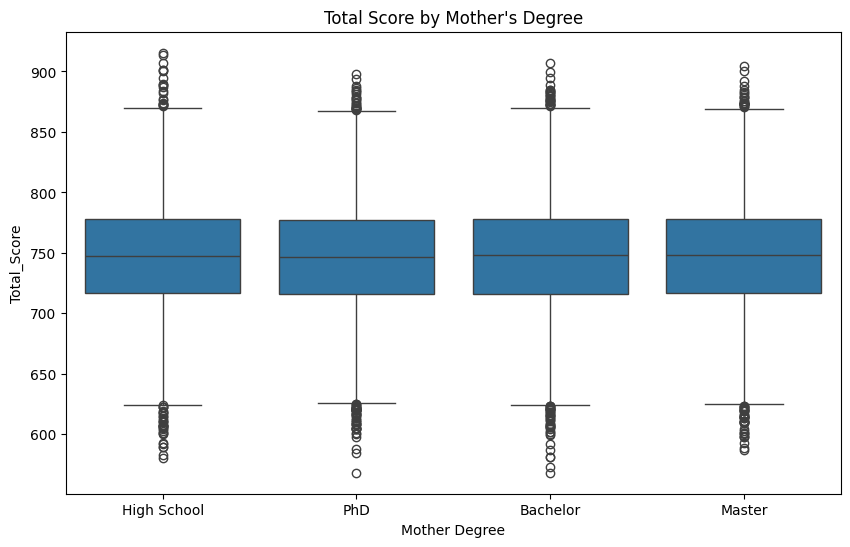

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Mother Degree', y='Total_Score', data=df)
plt.title("Total Score by Mother's Degree")
plt.show()

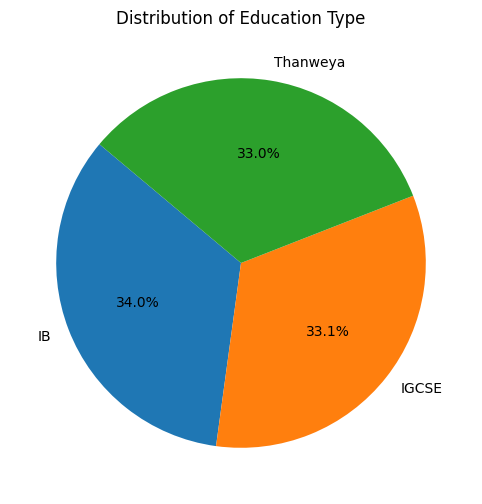

In [15]:
make_distibution=df['Education Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(make_distibution, labels=total_education.index,  autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Education Type')
plt.show()

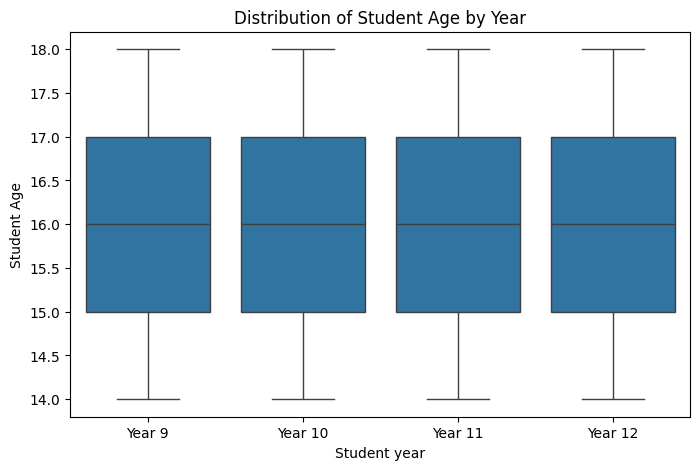

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Student year', y='Student Age', data=df)
plt.title("Distribution of Student Age by Year")
plt.show()


Feature engineering and cleaning

In [17]:
df['Father Degree'].fillna(df['Father Degree'].mode()[0], inplace=True)
df['Mother Degree'].fillna(df['Mother Degree'].mode()[0], inplace=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_14244\4135613353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Father Degree'].fillna(df['Father Degree'].mode()[0], inplace=True)
C:\Users\youss\AppData\Local\Temp\ipykernel_14244\4135613353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [18]:
object_data=[]
for i in df.columns:
    if df[i].dtypes=="object":
        object_data.append(i)
object_data


['Student Name',
 'Student year',
 'Father Degree',
 'Mother Degree',
 'Education Type']

In [19]:
data_number=df.drop(object_data, axis=1)

In [20]:
def detect_outliers_iqr(df):
    outliers_indices = []
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
            outliers_indices.extend(outliers)
    return list(set(outliers_indices))

# Detect outliers
outliers_indices = detect_outliers_iqr(data_number)
print(f'Number of outliers detected: {len(outliers_indices)}')

Number of outliers detected: 1966


In [21]:
data_cleaned=df.drop(outliers_indices, axis=0).reset_index(drop=True)
data_cleaned

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Total_Score
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,718.944478
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,725.122809
2,Melissa Lee,16,Year 10,Bachelor,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634,864.918668
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,803.786108
4,Eric Steele,17,Year 11,PhD,Bachelor,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,700.272092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48029,Sherri Smith,18,Year 9,PhD,High School,Thanweya,90.426678,67.660704,89.317914,69.488720,64.402254,84.985474,100.000000,100.000000,94.305701,57.383317,817.970761
48030,Bruce Vargas,15,Year 11,Bachelor,Master,IB,84.760901,96.154122,71.428657,52.579123,62.243286,63.188827,93.744022,72.375436,77.848848,66.807401,741.130623
48031,Clarence Foley,16,Year 11,Bachelor,PhD,IGCSE,82.196281,84.939252,56.661299,88.210451,84.573156,73.009089,68.842074,76.605868,76.255564,80.606913,771.899948
48032,Albert Berry,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414,765.043710


In [22]:
data_cleaned

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Total_Score
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,718.944478
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,725.122809
2,Melissa Lee,16,Year 10,Bachelor,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634,864.918668
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,803.786108
4,Eric Steele,17,Year 11,PhD,Bachelor,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,700.272092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48029,Sherri Smith,18,Year 9,PhD,High School,Thanweya,90.426678,67.660704,89.317914,69.488720,64.402254,84.985474,100.000000,100.000000,94.305701,57.383317,817.970761
48030,Bruce Vargas,15,Year 11,Bachelor,Master,IB,84.760901,96.154122,71.428657,52.579123,62.243286,63.188827,93.744022,72.375436,77.848848,66.807401,741.130623
48031,Clarence Foley,16,Year 11,Bachelor,PhD,IGCSE,82.196281,84.939252,56.661299,88.210451,84.573156,73.009089,68.842074,76.605868,76.255564,80.606913,771.899948
48032,Albert Berry,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414,765.043710


In [23]:
data_cleaned['Education Type']

0              IB
1              IB
2              IB
3        Thanweya
4           IGCSE
           ...   
48029    Thanweya
48030          IB
48031       IGCSE
48032    Thanweya
48033          IB
Name: Education Type, Length: 48034, dtype: object

In [24]:
"""""""""""
data_cleaned['Education Type']=data_cleaned['Education Type'].map({
 'IB':0,
 'Thanweya':1,
 'IGCSE':2                          
})
"""""""""

'""\ndata_cleaned[\'Education Type\']=data_cleaned[\'Education Type\'].map({\n \'IB\':0,\n \'Thanweya\':1,\n \'IGCSE\':2                          \n})\n'

In [25]:
data_cleaned['Education Type'].value_counts()

Education Type
IB          16308
Thanweya    15905
IGCSE       15821
Name: count, dtype: int64

In [26]:
# Define the mapping of degrees to numerical values
degree_mapping = {
    'Bachelor': 1,
    'PhD': 2,
    'High School': 3,
    'Master': 4
}

# Replace the values in the DataFrame
data_cleaned[['Father Degree', 'Mother Degree']] = data_cleaned[['Father Degree', 'Mother Degree']].replace(degree_mapping)

# Check for any unexpected values after replacement
unexpected_values_father = data_cleaned['Father Degree'].unique()
unexpected_values_mother = data_cleaned['Mother Degree'].unique()




C:\Users\youss\AppData\Local\Temp\ipykernel_14244\1950033498.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned[['Father Degree', 'Mother Degree']] = data_cleaned[['Father Degree', 'Mother Degree']].replace(degree_mapping)


In [27]:
columns_to_scale = ['Student Age', 'Subject_1', 'Subject_2', 'Subject_3', 'Subject_4',
                    'Subject_5', 'Subject_6', 'Subject_7', 'Subject_8', 'Subject_9', 'Subject_10','Total_Score']

scaler = MinMaxScaler()
data_cleaned[columns_to_scale] = scaler.fit_transform(data_cleaned[columns_to_scale])


In [28]:
data_cleaned

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Total_Score
0,Allison Lang,1.00,Year 9,3,3,IB,0.574786,0.785783,0.473968,0.758828,0.667214,0.247381,0.541220,0.697847,0.581825,0.375412,0.384993
1,Jaclyn Mcneil,0.00,Year 9,1,2,IB,0.871395,0.591727,0.451605,0.204832,0.742846,0.496146,0.119903,0.815953,0.834155,0.671722,0.410121
2,Melissa Lee,0.50,Year 10,1,2,IB,1.000000,0.756164,0.837108,0.732680,0.792111,0.853000,1.000000,0.754240,0.528243,0.682613,0.978672
3,Timothy Maxwell,0.00,Year 10,1,1,Thanweya,0.863417,1.000000,0.674921,0.671776,0.460209,0.726579,0.538115,0.863883,0.926567,0.276533,0.730045
4,Eric Steele,0.75,Year 11,2,1,IGCSE,0.615670,0.535873,0.467624,0.334744,0.538781,0.783918,0.444727,0.414302,0.769403,0.513792,0.309052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48029,Sherri Smith,1.00,Year 9,2,3,Thanweya,0.853378,0.507591,0.836184,0.535338,0.457098,0.771352,1.000000,1.000000,0.912745,0.349504,0.787734
48030,Bruce Vargas,0.25,Year 11,1,4,IB,0.766603,0.941441,0.561843,0.277819,0.424172,0.439422,0.904100,0.576420,0.660573,0.493352,0.475225
48031,Clarence Foley,0.50,Year 11,1,2,IGCSE,0.727324,0.770680,0.335378,0.820455,0.764725,0.588969,0.522371,0.641287,0.636159,0.703986,0.600364
48032,Albert Berry,0.25,Year 10,2,1,Thanweya,0.359463,0.724096,0.790055,1.000000,0.658628,0.846165,0.429831,0.349068,0.540741,0.706619,0.572479


In [29]:
#features=['Student Age','Father Degree','Mother Degree','Subject_1','Subject_2','Subject_3','Subject_4','Subject_5','Subject_6','Subject_7','Subject_8','Subject_9','Subject_10']
X = data_cleaned[columns_to_scale + ['Father Degree', 'Mother Degree']]
y=data_cleaned['Education Type']

y

0              IB
1              IB
2              IB
3        Thanweya
4           IGCSE
           ...   
48029    Thanweya
48030          IB
48031       IGCSE
48032    Thanweya
48033          IB
Name: Education Type, Length: 48034, dtype: object

In [30]:
X


,Student Age,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Total_Score,Father Degree,Mother Degree
0,1.00,0.574786,0.785783,0.473968,0.758828,0.667214,0.247381,0.541220,0.697847,0.581825,0.375412,0.384993,3,3
1,0.00,0.871395,0.591727,0.451605,0.204832,0.742846,0.496146,0.119903,0.815953,0.834155,0.671722,0.410121,1,2
2,0.50,1.000000,0.756164,0.837108,0.732680,0.792111,0.853000,1.000000,0.754240,0.528243,0.682613,0.978672,1,2
3,0.00,0.863417,1.000000,0.674921,0.671776,0.460209,0.726579,0.538115,0.863883,0.926567,0.276533,0.730045,1,1
4,0.75,0.615670,0.535873,0.467624,0.334744,0.538781,0.783918,0.444727,0.414302,0.769403,0.513792,0.309052,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48029,1.00,0.853378,0.507591,0.836184,0.535338,0.457098,0.771352,1.000000,1.000000,0.912745,0.349504,0.787734,2,3
48030,0.25,0.766603,0.941441,0.561843,0.277819,0.424172,0.439422,0.904100,0.576420,0.660573,0.493352,0.475225,1,4
48031,0.50,0.727324,0.770680,0.335378,0.820455,0.764725,0.588969,0.522371,0.641287,0.636159,0.703986,0.600364,1,2
48032,0.25,0.359463,0.724096,0.790055,1.000000,0.658628,0.846165,0.429831,0.349068,0.540741,0.706619,0.572479,2,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (38427, 14)
Shape of y_train: (38427,)


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Mapping of original categories to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping: ", label_mapping)


Label Mapping:  {'IB': 0, 'IGCSE': 1, 'Thanweya': 2}


In [34]:
'''''''''
label_encoder = LabelEncoder()

# Fit and transform the target
X_train_encoded = label_encoder.fit_transform(X_train)
X_test_encoded = label_encoder.transform(X_test)

# Mapping of original categories to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping: ", label_mapping)
'''''''''''


'\nlabel_encoder = LabelEncoder()\n\n# Fit and transform the target\nX_train_encoded = label_encoder.fit_transform(X_train)\nX_test_encoded = label_encoder.transform(X_test)\n\n# Mapping of original categories to encoded values\nlabel_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))\nprint("Label Mapping: ", label_mapping)\n'

In [ ]:
X_train

,Student Age,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Total_Score,Father Degree,Mother Degree
9426,0.75,0.554111,1.000000,0.538685,0.549662,0.301228,0.783976,0.532757,0.820159,0.474034,0.797913,0.557895,1,1
8943,0.25,0.537961,0.742641,0.427484,0.906742,0.532031,0.209110,0.639524,0.537897,0.228396,0.527717,0.275026,4,4
21905,0.00,0.876103,0.532546,0.698096,0.384689,0.828045,0.580954,0.806503,0.747476,0.328807,0.438255,0.522000,1,2
34167,0.25,0.814766,0.611003,0.242929,0.998735,0.976817,0.951337,0.304670,0.769462,0.665943,0.471659,0.679602,4,1
28042,0.75,0.430179,0.370061,0.481542,0.442622,0.673477,0.795102,0.696740,0.902539,0.784398,0.325147,0.436990,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.00,0.683017,0.713102,0.952193,0.593262,0.817082,0.588584,0.785953,0.604124,0.711986,1.000000,0.849058,3,3
44732,1.00,0.811653,0.847905,0.571043,0.499753,0.654479,0.466986,0.374090,0.649507,0.393713,0.851443,0.496042,3,1
38158,0.50,0.671506,0.414865,0.784704,0.695231,0.610607,0.495028,0.461734,0.465826,0.733171,0.479181,0.413259,1,1
860,0.50,0.340723,0.195345,0.479556,0.630106,0.850784,0.635130,0.758193,0.923772,0.266924,0.735715,0.414655,1,1


In [36]:
models={
    "logistic_regression":LogisticRegression(max_iter=200, penalty='l2', C=0.1),
    "xgb":xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01, eval_metric='logloss', reg_lambda=1, random_state=42),

    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_split=2, random_state=420, n_jobs=-1),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),

    
}

In [37]:
trained_models={}
for name,model in models.items():
    print(f"training model {name}")
    model.fit(X_train,y_train_encoded)
    trained_models[name]=model
    print(model.score(X_train,y_train_encoded))
    print(model.score(X_test,y_test_encoded))

training model logistic_regression
0.34447133525906265
0.3329863641095035
training model xgb
0.362921903869675
0.3331945456438014
training model DecisionTreeClassifier
1.0
0.32705319038201314
training model RandomForestClassifier
0.35678038878913265
0.33517227021963153
training model GradientBoostingClassifier
0.4235303302365524
0.33621317789112104
training model KNeighborsClassifier
0.5572644234522601
0.3312168210679713


In [38]:
for name,model in trained_models.items():
    print(f"Evaluating {name}")
    y_pred=model.predict(X_test)

    print(f"classification report for {name}")
    print(classification_report(y_test_encoded,y_pred))
    
    print(f"confusion  matrix  for {name}")
    print(confusion_matrix(y_test_encoded,y_pred))
    

Evaluating logistic_regression
classification report for logistic_regression
              precision    recall  f1-score   support

           0       0.33      0.61      0.43      3236
           1       0.34      0.08      0.13      3182
           2       0.33      0.30      0.32      3189

    accuracy                           0.33      9607
   macro avg       0.33      0.33      0.29      9607
weighted avg       0.33      0.33      0.29      9607

confusion  matrix  for logistic_regression
[[1973  278  985]
 [1980  267  935]
 [1989  241  959]]
Evaluating xgb
classification report for xgb
              precision    recall  f1-score   support

           0       0.34      0.65      0.44      3236
           1       0.32      0.11      0.16      3182
           2       0.33      0.24      0.28      3189

    accuracy                           0.33      9607
   macro avg       0.33      0.33      0.29      9607
weighted avg       0.33      0.33      0.29      9607

confusion  matrix 

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the distribution for RandomizedSearchCV
clf = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': randint(10, 50),
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train_encoded)

# Get the best hyperparameters
print("Best Hyperparameters from Randomized Search:", random_search.best_params_)

# Evaluate the model on the test data
y_pred = random_search.best_estimator_.predict(X_test)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

Best Hyperparameters from Randomized Search: {'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'max_leaf_nodes': 46, 'min_samples_leaf': 8, 'min_samples_split': 18}
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.27      0.30      3236
           1       0.34      0.08      0.13      3182
           2       0.34      0.66      0.45      3189

    accuracy                           0.34      9607
   macro avg       0.34      0.34      0.29      9607
weighted avg       0.34      0.34      0.29      9607



In [40]:
cls=DecisionTreeClassifier(criterion='gini',max_depth=40,max_leaf_nodes=46,min_samples_leaf=8,min_samples_split=18)
cls.fit(X_train,y_train_encoded)
print(f"train{cls.score(X_train,y_train_encoded)}")
print(f"test{cls.score(X_test,y_test_encoded)}")

train0.3612043615166419
test0.33694181326116374


In [41]:
y_pred=cls.predict(X_test)
print(confusion_matrix(y_test_encoded,y_pred))

[[ 863  277 2096]
 [ 831  263 2088]
 [ 836  242 2111]]


In [42]:
data_cleaned['Education Type']=data_cleaned['Education Type'].map({
 'IB':0,
 'Thanweya':1,
 'IGCSE':2
})

In [43]:

# Assuming 'performance' is your dependent variable (Y),
# and 'parental_education' and 'type_of_education' are your independent variables (X).

X = sm.add_constant(data_cleaned[['Father Degree','Education Type', 'Student Age']])

# Dependent variable
Y = data_cleaned['Total_Score']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.079
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.357
Time:                        21:40:13   Log-Likelihood:                 14677.
No. Observations:               48034   AIC:                        -2.935e+04
Df Residuals:                   48030   BIC:                        -2.931e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5080      0.002    221.

In [44]:

# Assuming 'performance' is your dependent variable (Y),
# and 'parental_education' and 'type_of_education' are your independent variables (X).

X = sm.add_constant(data_cleaned[['Mother Degree','Education Type', 'Student Age']])

# Dependent variable
Y = data_cleaned['Total_Score']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Get the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Total_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5134
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.673
Time:                        21:40:13   Log-Likelihood:                 14677.
No. Observations:               48034   AIC:                        -2.935e+04
Df Residuals:                   48030   BIC:                        -2.931e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5055      0.002    219.